In [1]:
#Customer segmentation from supervised classification


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/diban/OneDrive/Documents/Python project/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis


In [5]:
#Checking the summary of the datasets
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

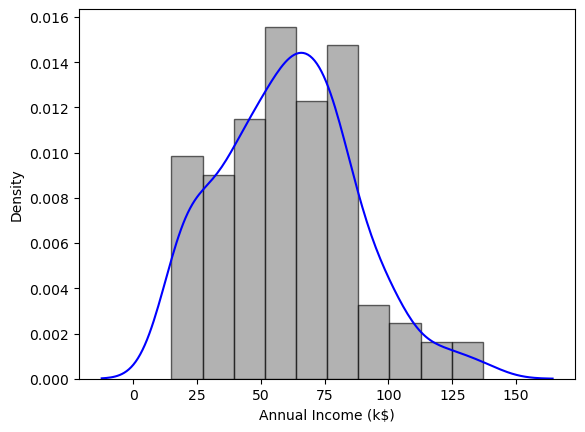

In [6]:
#Create a histogram to see the distribution of Annual Income 
sns.distplot(df['Annual Income (k$)'], color='grey', hist_kws={'edgecolor': 'black', 'alpha': 0.6},kde_kws={'color': 'blue'})

In [7]:
#Getting the columns names of the data
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

[<Axes: xlabel='Age', ylabel='Density'>, <Axes: xlabel='Annual Income (k$)', ylabel='Density'>, <Axes: xlabel='Spending Score (1-100)', ylabel='Density'>]


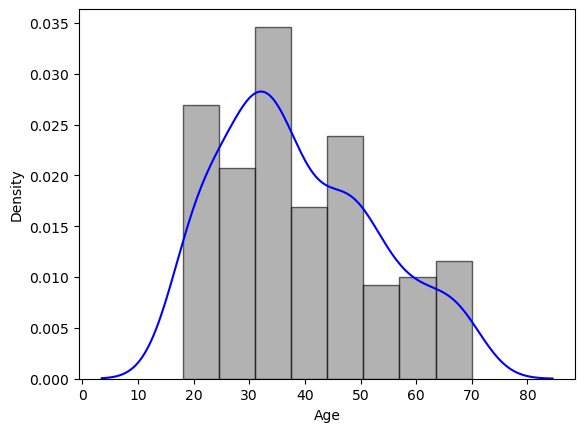

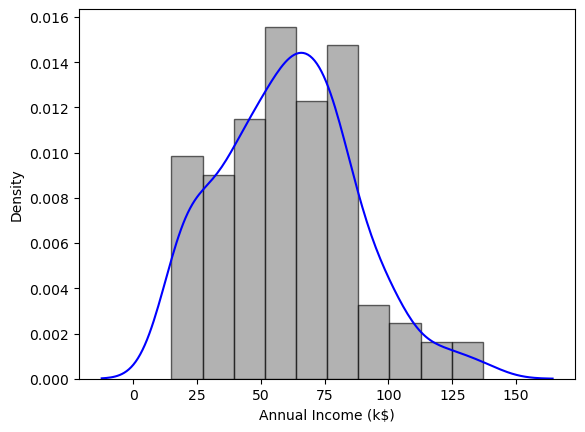

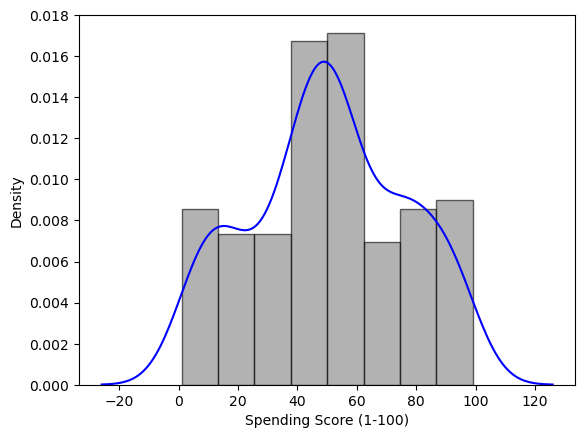

In [8]:
#Creating a for loop to create all of the columns visual distribution
columns =[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
histo =[]
for i in columns:
    plt.figure() #for each alteration create a new figure
    histograms = sns.distplot(df[i], color='grey', hist_kws={'edgecolor': 'black', 'alpha': 0.6},kde_kws={'color': 'blue'})
    histo.append(histograms)
print(histo)

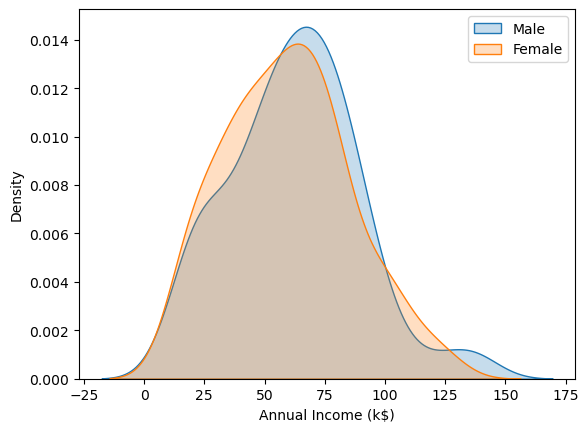

In [9]:
#identifying multiple modes (peaks) in the data distribution
sns.kdeplot(data=df[df['Gender']=='Male'], x='Annual Income (k$)', shade=True, label='Male')
sns.kdeplot(data=df[df['Gender']=='Female'], x='Annual Income (k$)', shade=True, label='Female')

plt.legend()  # Add legend
plt.show()

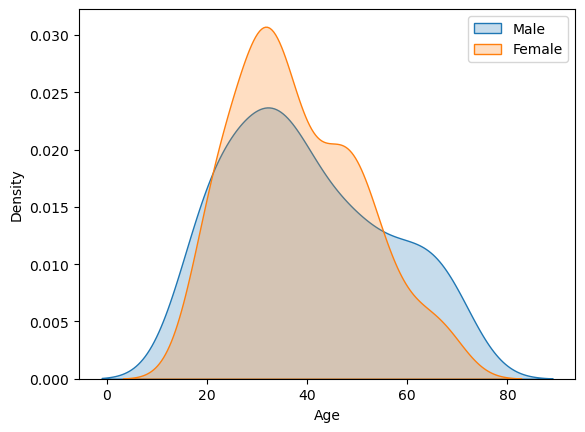

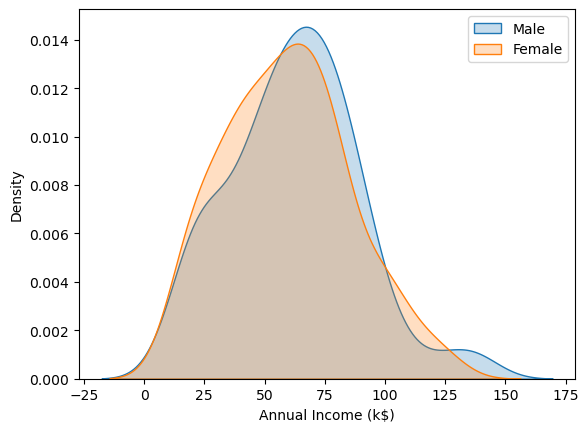

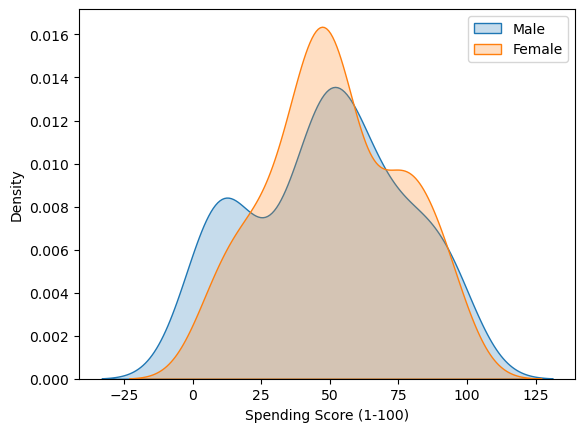

In [10]:
#Creating a for loop to create all of the columns visual distribution
columns =[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure() #for each alteration create a new figure
    sns.kdeplot(data=df[df['Gender']=='Male'], x= i, shade=True, label='Male')
    sns.kdeplot(data=df[df['Gender']=='Female'], x=i, shade=True, label='Female')

    plt.legend()  # Add legend
    plt.show()

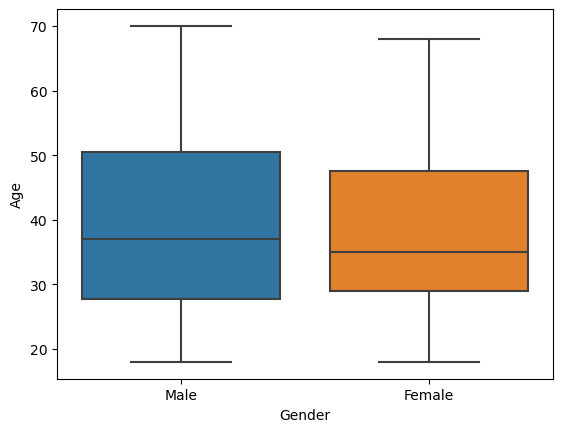

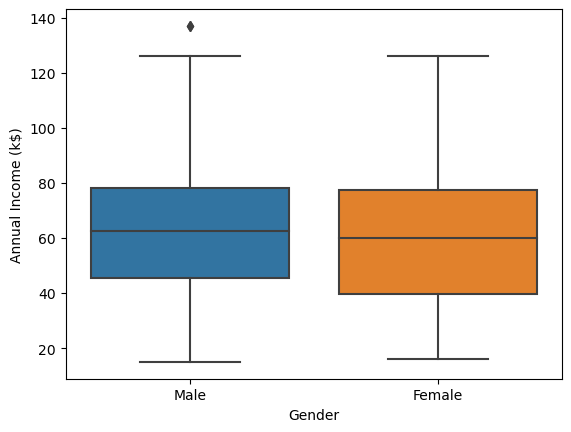

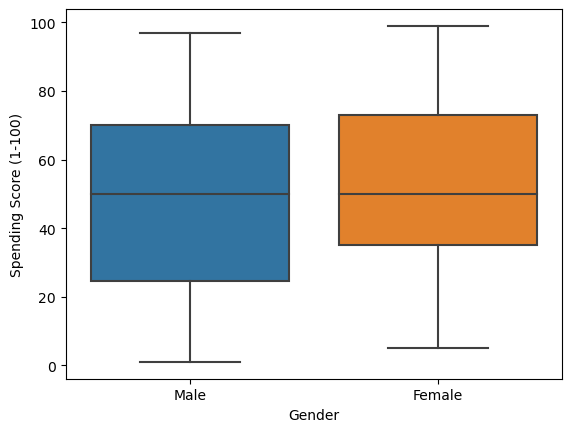

In [11]:
#Creating a for loop to create all of the columns visual distribution
columns =[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure() #for each alteration create a new figure
    sns.boxplot(data = df,x= 'Gender',y= df[i])

In [12]:
#To check the Percentage number of the two different genders in the datasets
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

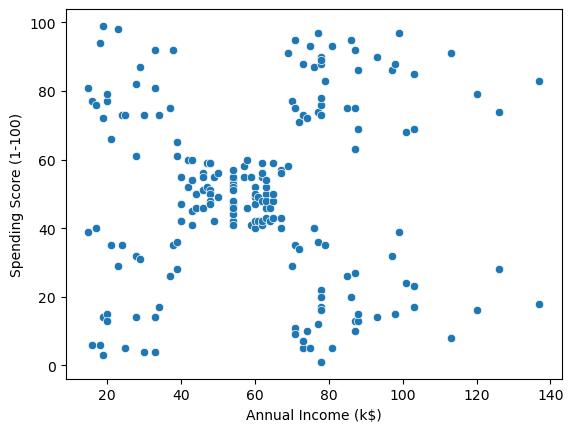

In [13]:
#Creating a scatterplot of the Annual income and spending score to see clusters in their relationship
sns.scatterplot(data = df, x ='Annual Income (k$)',y='Spending Score (1-100)' );

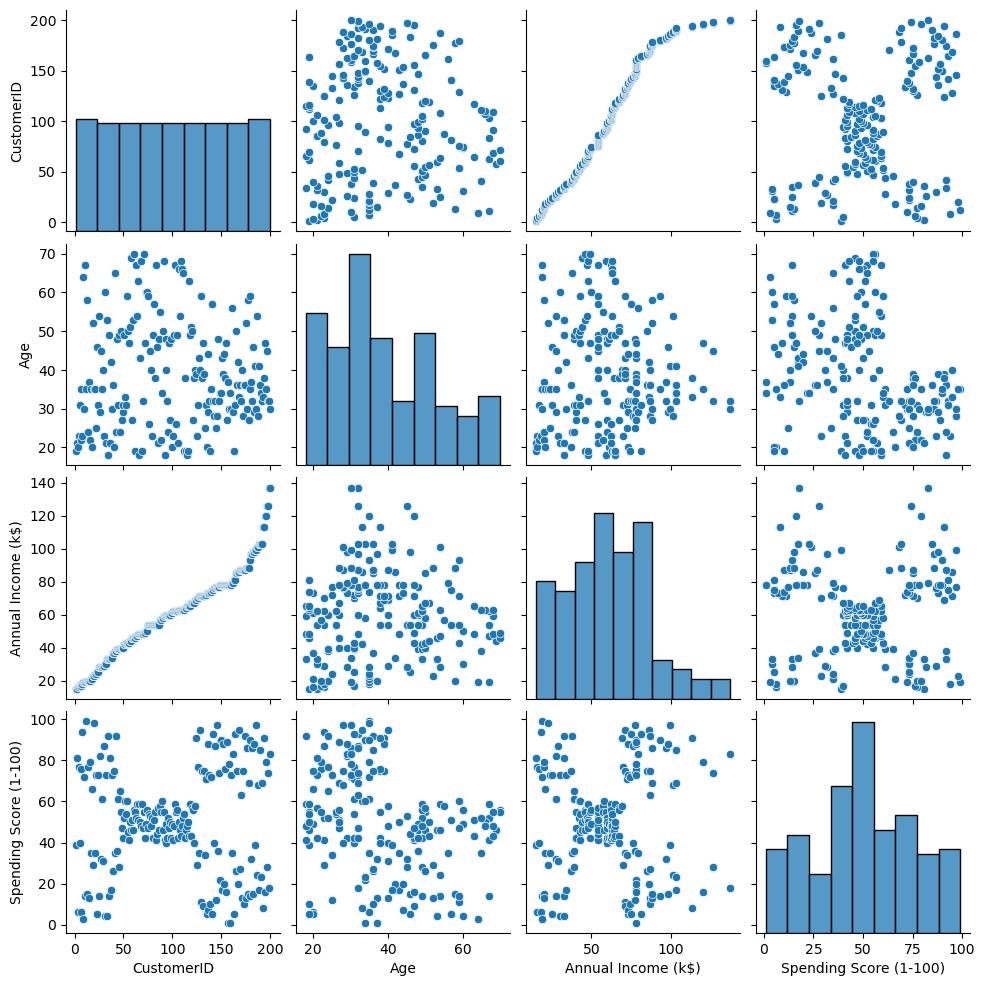

In [14]:
#For furtheer details in the information of the data we use pairplots
#df.drop('CustomerID',axis = 1,inplace = True)
sns.pairplot(data =df);

In [15]:
#Get mean Values for our data based on gender
df.groupby(['Gender']).mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [16]:
#To check the relationship between the columns we have we need to comput the corraltion
df.corr(numeric_only = True) #here i used numeric only to filter out Character data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

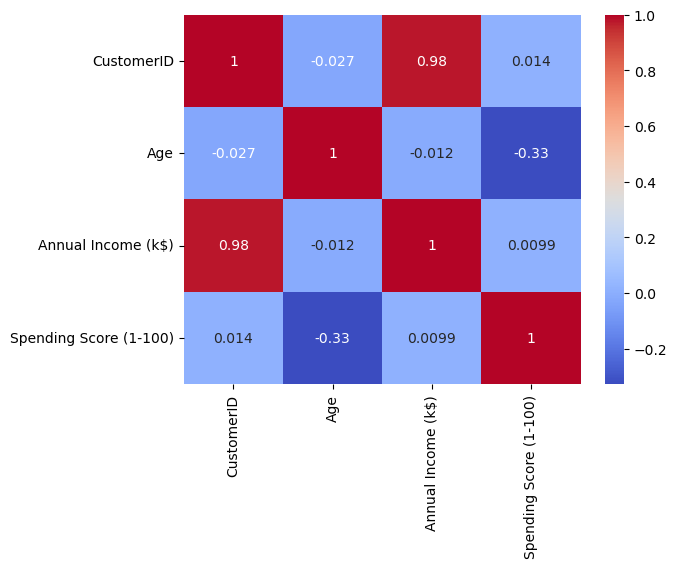

In [17]:
#Then i also create a heatmap from this correlation
sns.heatmap(df.corr(numeric_only = True),annot = True, cmap = 'coolwarm')

# Clustering- Univariate and Bivariate

In [18]:
#Initiate - Calling the KMeans clustering function
clustering1= KMeans(n_clusters =3)

In [19]:
#Fit the model into our datasets
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [20]:
#To check the clustering labels
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
#Appending the labels to our dataframe to see which roows falls  onto each cluster
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [22]:
#To check how many of our customers fall into each cluster
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [23]:
#Find what the ideal number of clusters we need 
#Using the elbow method
clustering1.inertia_  #distance between cell centroid

23517.33093093093

In [24]:
#Create a loop to check the inertia for each cluster numbers
inertia_scores =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['Annual Income (k$)']]) #fit the kmeans with the annual income
    inertia_scores.append(kmeans.inertia_) #calculate the inertia values and append them to the list
    
    

In [25]:
#Checking the inertia scores
inertia_scores


[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3936.796825396824,
 2822.4996947496966,
 2173.2874458874467,
 1783.4240609064132]

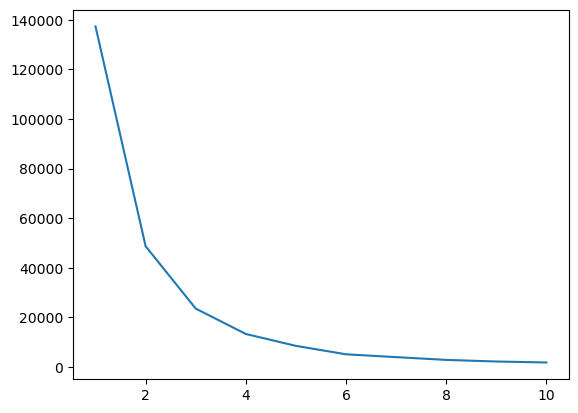

In [26]:
#Plotting the values to the elbow
plt.plot(range(1,11), inertia_scores);

In [27]:
#getting thr datasets names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [28]:
#Firstly for analysis I Calculating the mean of the Income cluster
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean() #passed in a list

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [29]:
#Initiate - Calling the KMeans clustering function
clustering2= KMeans(n_clusters = 5)

In [30]:
#Fit the model into our datasets and adding the new model column into our dataframe
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['Spending and Income Cluster']= clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


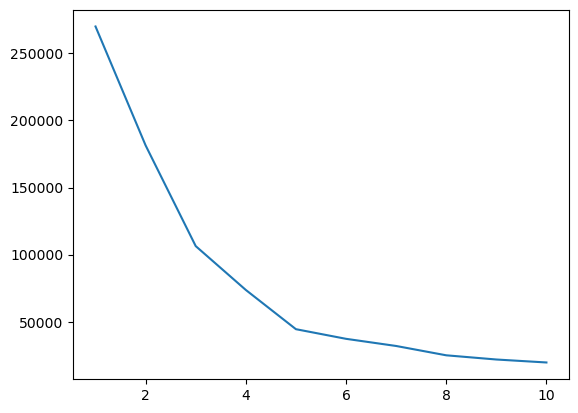

In [31]:
inertia_scores2 =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']]) #fit the kmeans with the annual income
    inertia_scores2.append(kmeans.inertia_) #calculate the inertia values and append them to the list
#Ploting the inertia parameters
plt.plot(range(1,11),inertia_scores2);

In [32]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


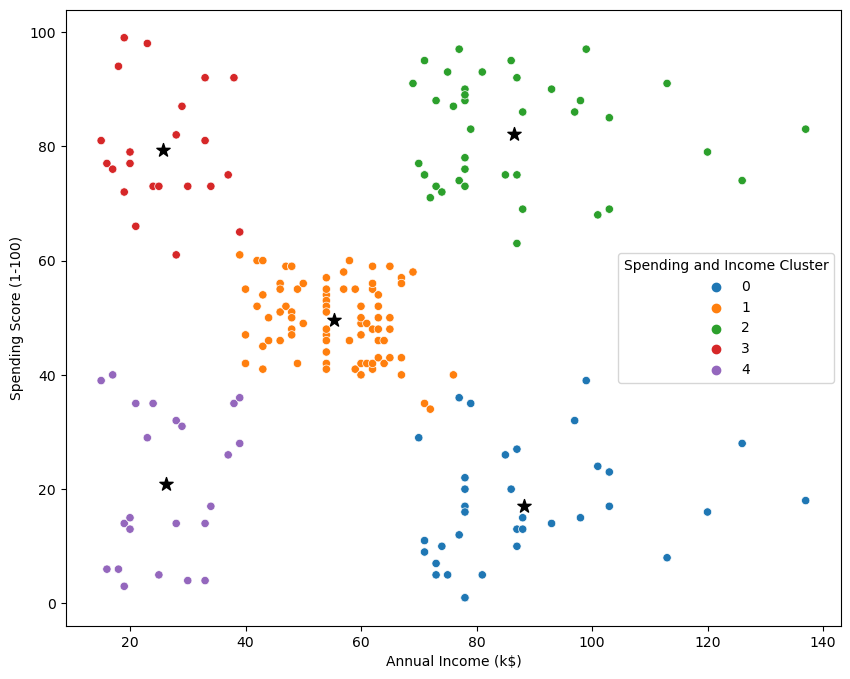

In [33]:
#Since its bivariate analysis now we can visualize the data by using  scatter plot
plt.figure(figsize = (10,8)) #resizing the figure size 
plt.scatter(x=centers['x'],y=centers['y'] ,s = 100, c= 'black',marker ='*')#adding the cell centres
sns.scatterplot(df,x='Annual Income (k$)',y ='Spending Score (1-100)',hue ='Spending and Income Cluster',palette = 'tab10');

In [34]:
#computing cross tabulation of income and spendindi cluster and gender
pd.crosstab(df['Spending and Income Cluster'], df['Gender'],normalize = "index")


Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [35]:
#Checking the mean of the Spending and income cluster
df.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean() #passed in a list

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043
